In [49]:
import pandas as pd

data = pd.read_csv('data/mushrooms.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [50]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
X = data.drop('class', axis=1)
y = data['class']

le = LabelEncoder()
X = X.apply(le.fit_transform)

le = LabelEncoder()
y = le.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(max_depth=5)
model.fit(x_train, y_train)

print("Score: ", model.score(x_test, y_test))

Score:  0.9766153846153847


In [52]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       843
           1       0.96      0.99      0.98       782

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



Get feature importance

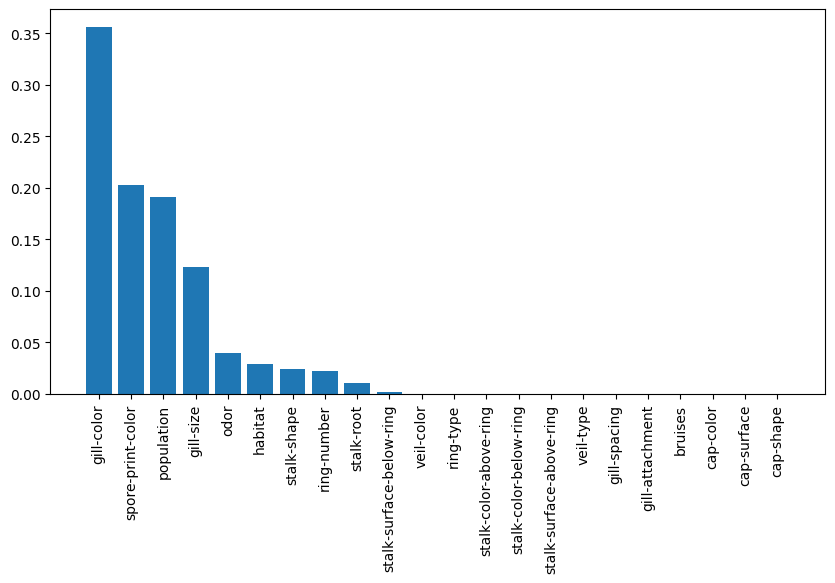

In [53]:
import matplotlib.pyplot as plt

# Get feature importances from our model
importances = model.feature_importances_
# Get the index of importances from greatest importance to least
sorted_index = importances.argsort()[::-1]
x = range(len(importances))

plt.figure(figsize=(10, 5))
plt.bar(x, importances[sorted_index], tick_label=X.columns[sorted_index])
plt.xticks(rotation=90)
plt.show()


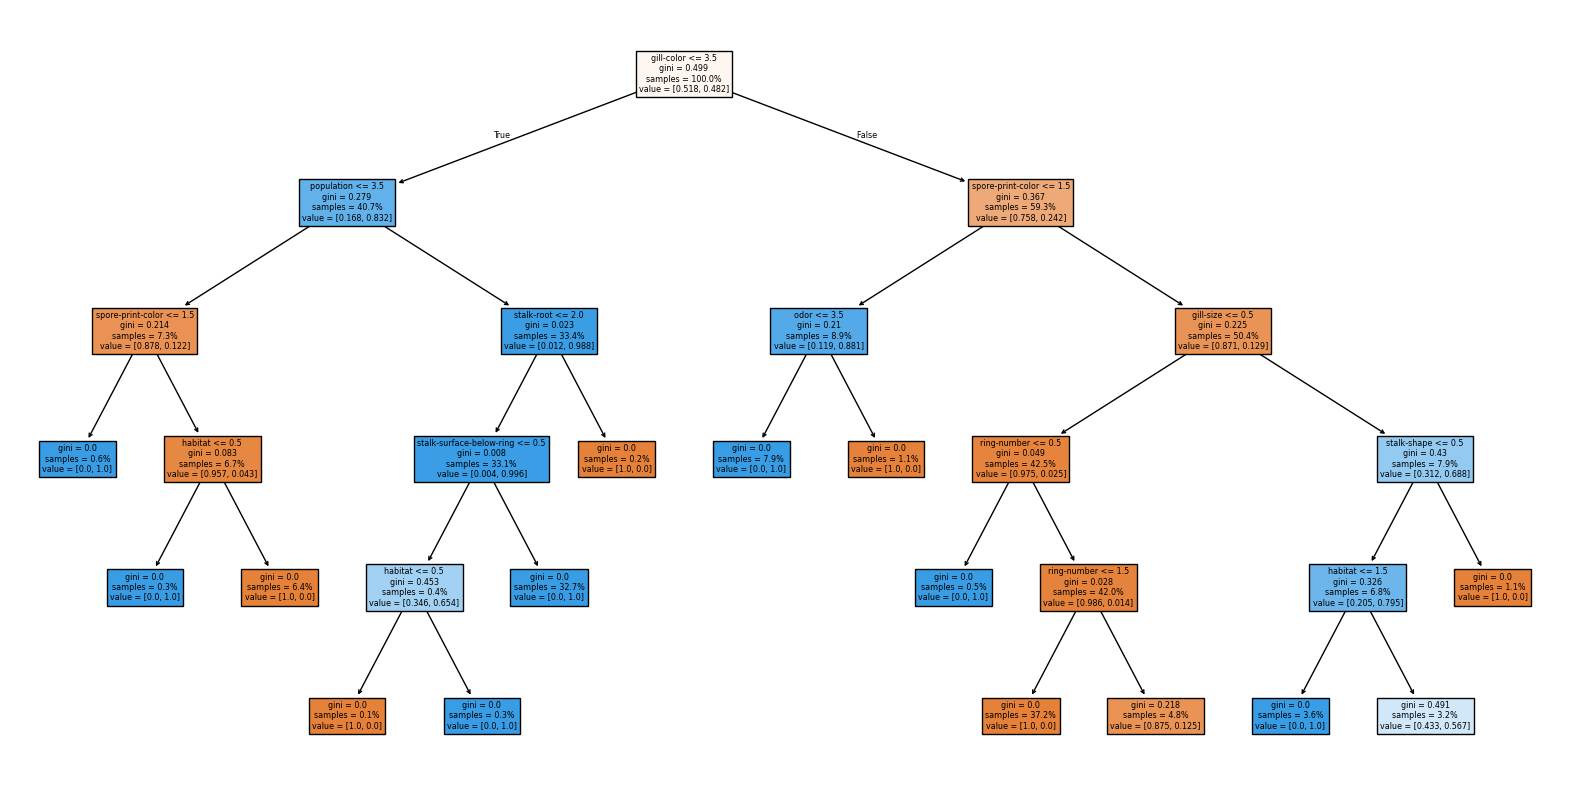

In [54]:
# Draw the decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, proportion=True)
plt.show()

# Randomforest

In [55]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=3, max_depth=5, random_state=42)
model.fit(x_train, y_train)

print("Score: ", model.score(x_test, y_test))


Score:  0.9815384615384616


In [ ]:
model = RandomForestClassifier(n_estimators=3, max_depth=5, random_state=42, max_features=0.01)
model.fit(x_train, y_train)

print("Score: ", model.score(x_test, y_test))

Score:  0.9513846153846154


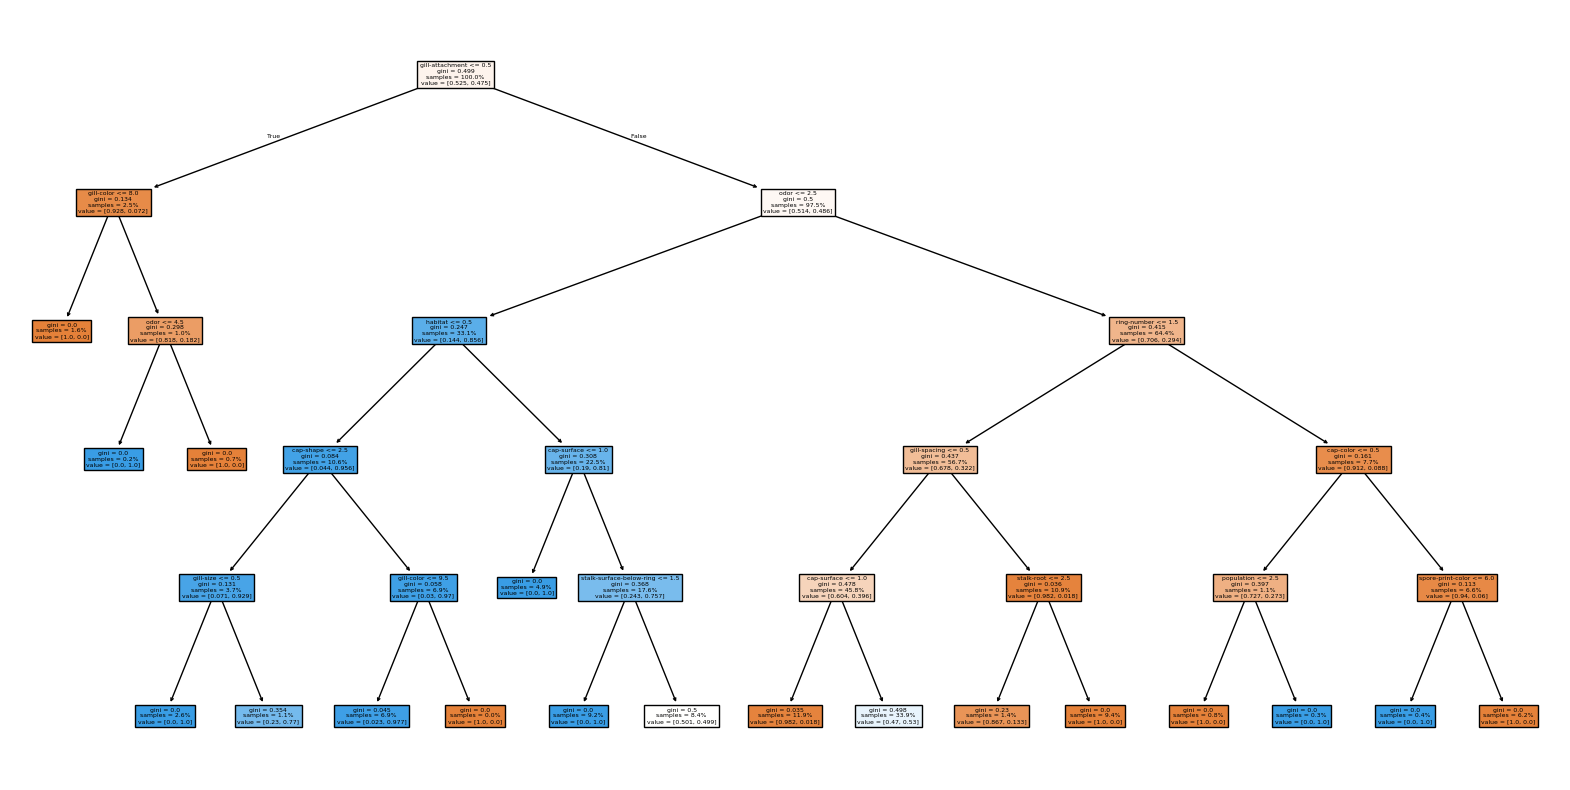

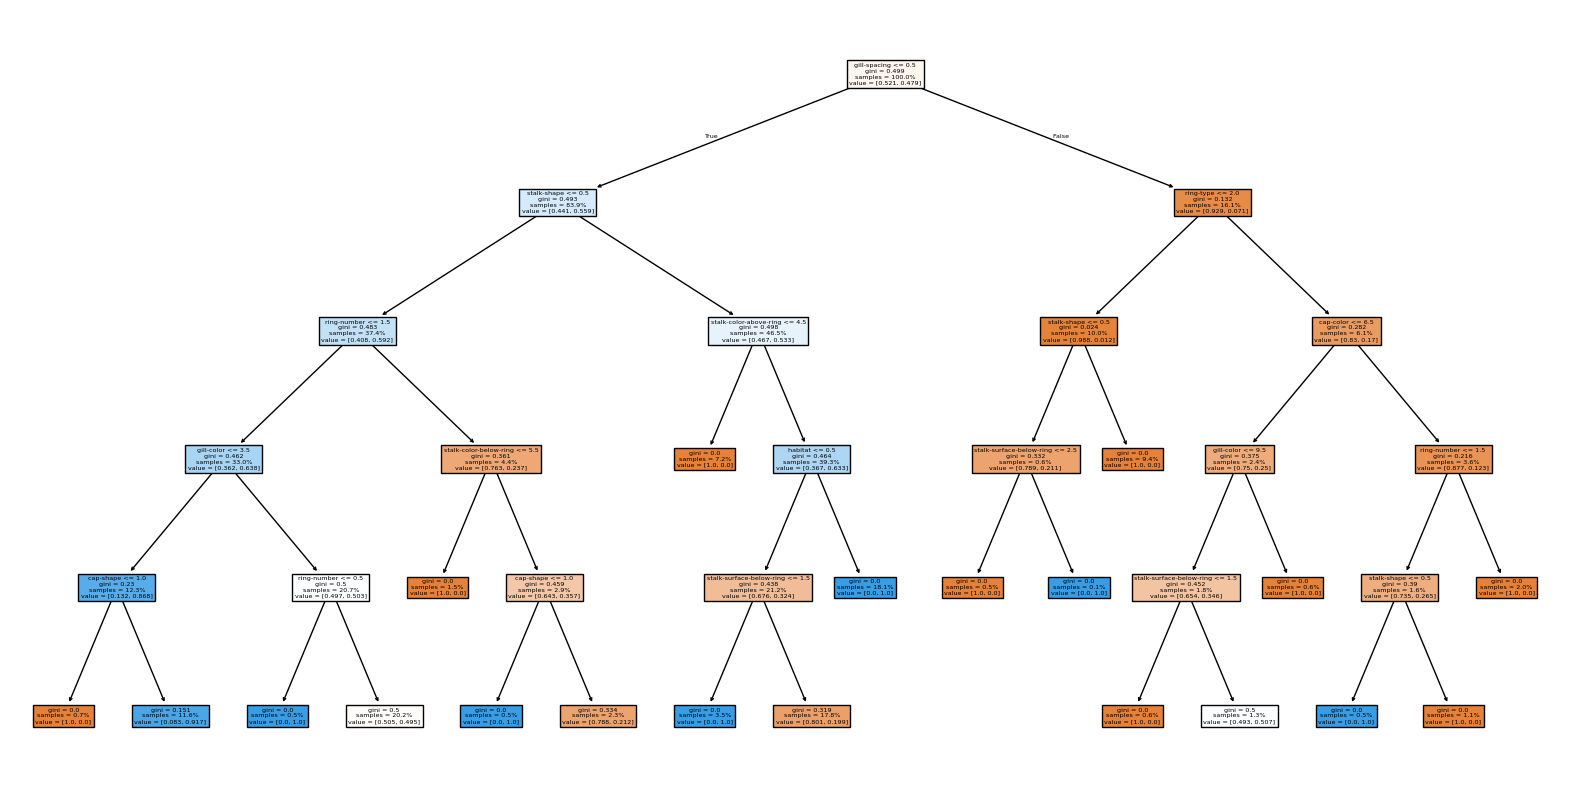

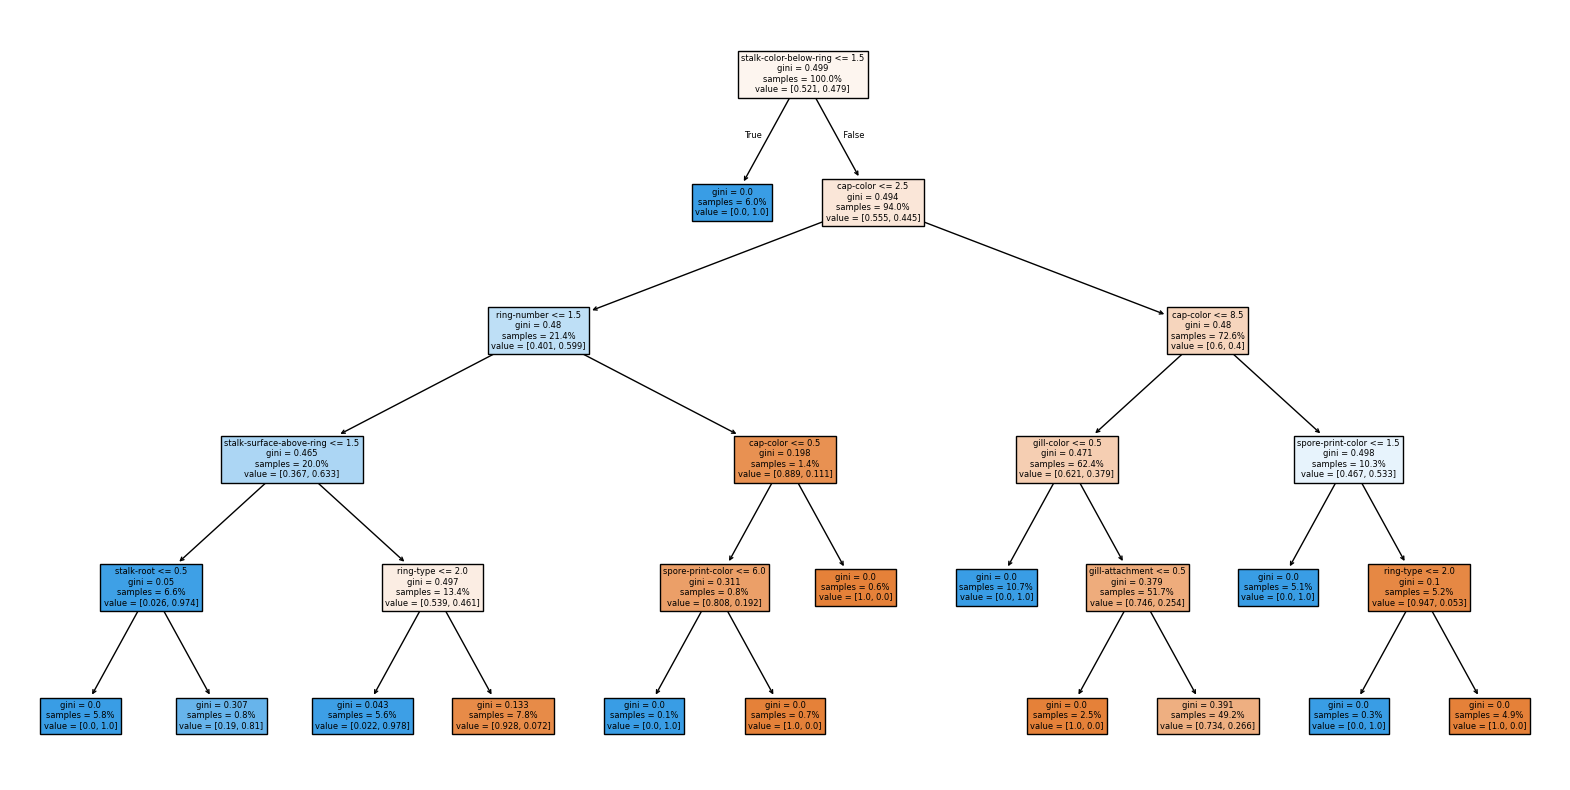

In [57]:
# Draw the decision trees in the forest
for tree in model.estimators_:
    plt.figure(figsize=(20, 10))
    plot_tree(tree, filled=True, feature_names=X.columns, proportion=True)
    plt.show()

# Heart Attack Prediction

In [24]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")

print("Path to dataset files:", path)

data = pd.read_csv(f"{path}/heart.csv")
data.info()

100%|██████████| 8.56k/8.56k [00:00<00:00, 2.91MB/s]

Extracting files...
Path to dataset files: C:\Users\engsm\.cache\kagglehub\datasets\fedesoriano\heart-failure-prediction\versions\1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [25]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


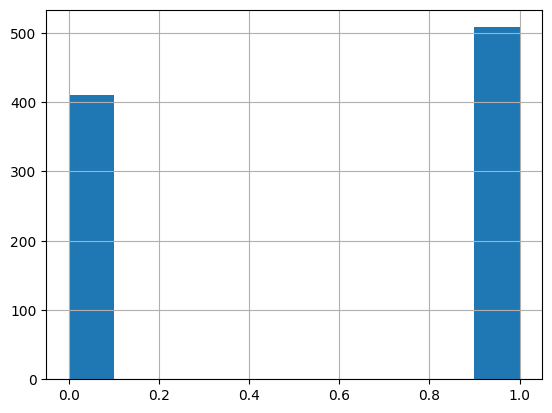

In [26]:
data['HeartDisease'].hist()
plt.show()

In [27]:
from sklearn.preprocessing import LabelEncoder

X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

le = LabelEncoder()
X = X.apply(lambda x: le.fit_transform(x) if x.dtype == 'O' else x)

X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2


In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

model = DecisionTreeClassifier(max_depth=8, class_weight={0:1, 1:5}, random_state=42)
model.fit(x_train, y_train)

print("Score: ", model.score(x_test, y_test))
print(classification_report(y_test, model.predict(x_test)))

Score:  0.8369565217391305
              precision    recall  f1-score   support

           0       0.78      0.84      0.81        77
           1       0.88      0.83      0.86       107

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.84      0.84       184



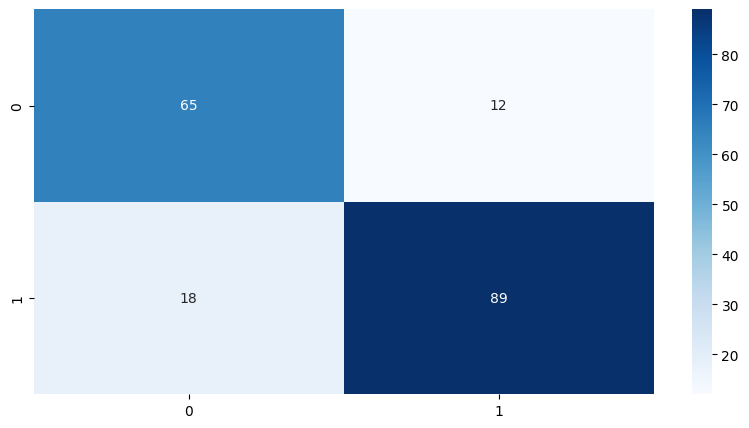

In [44]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_matrix = confusion_matrix(y_test, model.predict(x_test))
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.show()

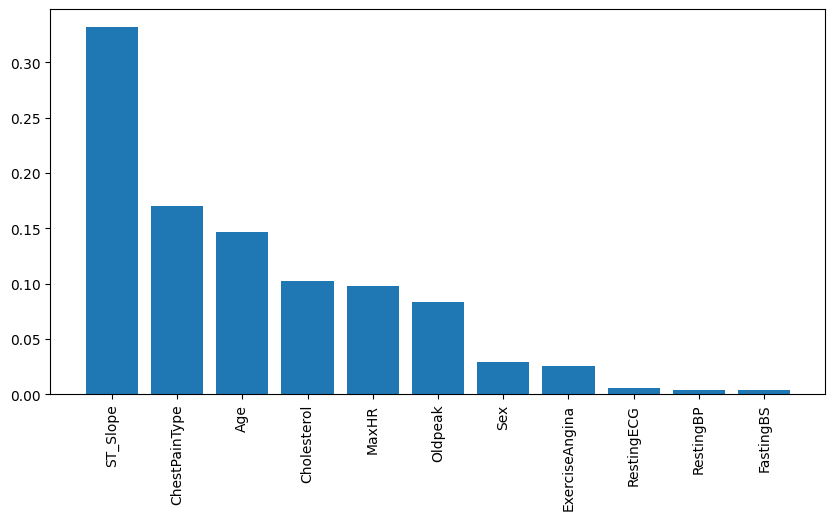

In [46]:
feature_importances = model.feature_importances_
sorted_index = feature_importances.argsort()[::-1]
x = range(len(feature_importances))

plt.figure(figsize=(10, 5))
plt.bar(x, feature_importances[sorted_index], tick_label=X.columns[sorted_index])
plt.xticks(rotation=90)
plt.show()

# Titanic Dataset

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

100%|██████████| 22.0k/22.0k [00:00<00:00, 316kB/s]

Extracting files...
Path to dataset files: C:\Users\engsm\.cache\kagglehub\datasets\yasserh\titanic-dataset\versions\1


In [ ]:
df = pd.read_csv(path + "/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.drop(columns=['PassengerId', 'Name', 'Cabin'], inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,523,7.2500,2
1,1,1,0,38.0,1,0,596,71.2833,0
2,1,3,0,26.0,0,0,669,7.9250,2
3,1,1,0,35.0,1,0,49,53.1000,2
4,0,3,1,35.0,0,0,472,8.0500,2


In [ ]:
# Impute missing age values
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df[['Age']] = imputer.fit_transform(df[['Age']])

df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop(columns=['Survived'])
y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred))



Logistic Regression Accuracy: 0.8100558659217877
Logistic Regression Confusion Matrix:
 [[90 15]
 [19 55]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [ ]:
model.coef_

array([[-8.72476590e-01, -2.59926571e+00, -3.08404664e-02,
        -2.93407489e-01, -1.21609295e-01, -5.20606043e-04,
         3.02213999e-03, -2.22209580e-01]])

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=50, min_samples_leaf=50)
model.fit(x_train, y_train)
y_pred_tree = model.predict(x_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Decision Tree Accuracy:", accuracy_tree)
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_tree))


Decision Tree Accuracy: 0.8100558659217877
Decision Tree Confusion Matrix:
 [[98  7]
 [27 47]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.93      0.85       105
           1       0.87      0.64      0.73        74

    accuracy                           0.81       179
   macro avg       0.83      0.78      0.79       179
weighted avg       0.82      0.81      0.80       179



In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42, n_estimators=5)
model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Random Forest Training Accuracy:", train_accuracy)

y_pred_forest = model.predict(x_test)
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print("Random Forest Accuracy:", accuracy_forest)
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_forest))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_forest))


Random Forest Training Accuracy: 0.9705056179775281
Random Forest Accuracy: 0.8324022346368715
Random Forest Confusion Matrix:
 [[93 12]
 [18 56]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86       105
           1       0.82      0.76      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
model = RandomForestClassifier(random_state=42, n_estimators=5)
model.fit(x_train_scaled, y_train)
y_train_pred = model.predict(x_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Random Forest Training Accuracy after Scaling:", train_accuracy)

y_pred_forest = model.predict(x_test_scaled)
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print("Random Forest Accuracy after Scaling:", accuracy_forest)
print("Random Forest Confusion Matrix after Scaling:\n", confusion_matrix(y_test, y_pred_forest))
print("Random Forest Classification Report after Scaling:\n", classification_report(y_test, y_pred_forest))

Random Forest Training Accuracy after Scaling: 0.9691011235955056
Random Forest Accuracy after Scaling: 0.8324022346368715
Random Forest Confusion Matrix after Scaling:
 [[93 12]
 [18 56]]
Random Forest Classification Report after Scaling:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86       105
           1       0.82      0.76      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [ ]:
# Save the model
import pickle
model_filename = 'random_forest_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)
print(f"Model saved to {model_filename}")


Model saved to random_forest_model.pkl


In [ ]:
# Load the model
with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)
print("Model loaded from", model_filename)

# Make predictions with the loaded model
y_pred_loaded = loaded_model.predict(x_test_scaled)
accuracy_loaded = accuracy_score(y_test, y_pred_loaded)
print("Loaded Model Accuracy:", accuracy_loaded)

Model loaded from random_forest_model.pkl
Loaded Model Accuracy: 0.8324022346368715
